There are two kinds of multi class classification.

1. One vs All multi class - Here we create a unique output for each possible class, here at each output node, check if the output belongs to a particular class. Sum of all probabilities of output node must be one.

This can be achieved by using SoftMax activation function.

Softmax assigns a decimal probabilities to multi class problem, these decimal probabilities must add upto 1.

There are two options in softmax.

1. Full Softmax - that is it assigns probabilities for all classes.
2. candidate sampling - softmax calculates the probabilities for all positive classes and only a random samples of negetive labels. For example in case of determining if the given image is beagle or bloodhound, then softmax generates probabibilities for these two classes along with random number of non-dog classes.



In [1]:
%tensorflow_version 2.x
from __future__ import absolute_import, division, print_function, unicode_literals

TensorFlow 2.x selected.


In [0]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
from matplotlib import pyplot as plt

# The following lines adjust the granularity of reporting. 
pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format

# The following line improves formatting when ouputting NumPy arrays.
np.set_printoptions(linewidth = 200)

In [0]:
(x_train, y_train),(x_test,y_test) = tf.keras.datasets.mnist.load_data()

In [7]:
x_train[2197]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 213, 254,  50,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  92, 252, 253, 131,   0,   0,   0

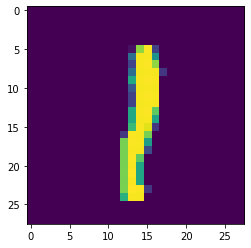

In [8]:
plt.imshow(x_train[2197])

In [0]:
# normalization

x_train_normalized = (x_train / 255.0)
x_test_normalized = (x_test / 255.0)

In [0]:
def plot_curve(epochs, hist, list_of_metrics):
  """Plot a curve of one or more classification metrics vs. epoch."""  
  # list_of_metrics should be one of the names shown in:
  # https://www.tensorflow.org/tutorials/structured_data/imbalanced_data#define_the_model_and_metrics  

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Value")

  for m in list_of_metrics:
    x = hist[m]
    plt.plot(epochs[1:], x[1:], label=m)

  plt.legend()

In [0]:
def create_model(my_learning_rate):

  model = tf.keras.Sequential()

  model.add(tf.keras.layers.Flatten(input_shape=(28,28)))

  model.add(tf.keras.layers.Dense(units = 256, activation = 'relu'))

  model.add(tf.keras.layers.Dense(units=128, activation='relu'))

  model.add(tf.keras.layers.Dropout(rate=0.2))

  model.add(tf.keras.layers.Dense(units=10, activation='softmax'))

  model.compile(optimizer=tf.keras.optimizers.Adam(my_learning_rate), loss="sparse_categorical_crossentropy", metrics=['accuracy'])

  return model

In [0]:
def train_model(model, training_feature, train_label, epochs, batch_size=None, validation_split=0.1):

  history = model.fit(x=training_feature, y=train_label, batch_size=batch_size, epochs=epochs, shuffle=True, validation_split=validation_split)

  epochs = history.epoch
  hist = pd.DataFrame(history.history)

  return epochs, hist

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 2s 34us/sample - loss: 1.0340 - accuracy: 0.6902 - val_loss: 0.3404 - val_accuracy: 0.9005
Epoch 2/50
48000/48000 [==============================] - 1s 27us/sample - loss: 0.3494 - accuracy: 0.8984 - val_loss: 0.2408 - val_accuracy: 0.9293
Epoch 3/50
48000/48000 [==============================] - 1s 27us/sample - loss: 0.2465 - accuracy: 0.9276 - val_loss: 0.1858 - val_accuracy: 0.9457
Epoch 4/50
48000/48000 [==============================] - 1s 27us/sample - loss: 0.1955 - accuracy: 0.9429 - val_loss: 0.1614 - val_accuracy: 0.9522
Epoch 5/50
48000/48000 [==============================] - 1s 27us/sample - loss: 0.1586 - accuracy: 0.9526 - val_loss: 0.1407 - val_accuracy: 0.9585
Epoch 6/50
48000/48000 [==============================] - 1s 27us/sample - loss: 0.1347 - accuracy: 0.9603 - val_loss: 0.1240 - val_accuracy: 0.9636
Epoch 7/50
48000/48000 [==============================] 

[0.08529272228479386, 0.9792]

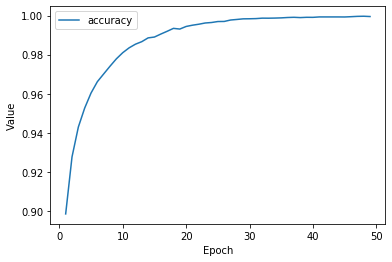

In [22]:
learning_rate = 0.003
epochs = 50
batch_size = 4000
validation_split = 0.2

my_model = create_model(learning_rate)

epochs, hist = train_model(my_model, x_train_normalized, y_train, epochs, batch_size, validation_split)

list_of_metrices_to_plot = ['accuracy']
plot_curve(epochs, hist, list_of_metrices_to_plot)

print("\n Evaluate the new model against the test set:")
my_model.evaluate(x=x_test_normalized, y=y_test, batch_size=batch_size)